In [1]:
# auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cns.data_utils as cdu

> Note: Needs to run `./tests/test_time.sh` before.

In [3]:
times = pd.read_csv('../docs/times.tsv', sep='\t', header=None)
times.columns = ['timestamp', 'command', 'threads', 'output', 'time']
times['command'] = times.apply(lambda row: 'agg-genes' if 'COSMIC' in row['output'] and row['command'] == 'aggregate' else ('agg-breaks' if row['command'] == 'aggregate' else row['command']), axis=1)
# drop where threads == 32
times.head(7)

,timestamp,command,threads,output,time
0,2025-06-07 18:36:46,fill,1,./temp/PCAWG_cns_fill.tsv,118.467918
1,2025-06-07 18:38:48,coverage,1,./temp/PCAWG_samples.tsv,0.624957
2,2025-06-07 18:38:50,impute,1,./temp/PCAWG_cns_imp.tsv,41.245874
3,2025-06-07 18:39:34,ploidy,1,./temp/PCAWG_samples.tsv,12.629566
4,2025-06-07 18:39:48,agg-breaks,1,./temp/PCAWG_bin_1MB.tsv,163.416736
5,2025-06-07 18:42:56,agg-genes,1,./temp/PCAWG_bin_COSMIC.tsv,45.640325
6,2025-06-07 18:43:49,fill,2,./temp/PCAWG_cns_fill.tsv,61.329017


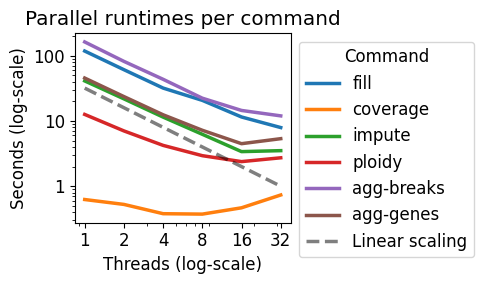

In [4]:
plt.rcParams.update({'font.size': 12}) 

# Get the unique commands
commands = times['command'].unique()
threads = times['threads'].unique()

plt.figure(figsize=(5, 3), dpi=100)

# Plot a line for each command
for cmd in commands:
    subset = times[times['command'] == cmd]
    plt.plot(subset['threads'], subset['time'], label=cmd, linewidth=2.5, alpha=1)

# add a y = -x line to show linear scaling
y_rev = np.array(threads)[::-1]
plt.plot(threads, y_rev, label='Linear scaling', linestyle='--', color='black', alpha=0.5, linewidth=2.5)

plt.xscale('log')
plt.yscale('log')
plt.xticks(threads, threads)
plt.yticks([1, 10, 100], [1, 10, 100])
plt.xlabel('Threads (log-scale)')
plt.ylabel('Seconds (log-scale)')
plt.title('Parallel runtimes per command')
# plot legend on the right of the box, title it 'Command'
plt.legend(title='Command', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# save as a PDF
cdu.save_doc_fig("times")